#### <h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 16 </h1>
<h1><center>  Small World Graphs </h1> 
 <h1><center>  Analisi di un DataSet </h1>  
<h1><center> 21 Marzo 2023 </h1>

# Random Graphs: riassunto
    
* in un grafo random il grado medio dei nodi dipende dalla probabilità **p** con cui si inseriscono gli archi e dal numero di vertici del grafo. 
    * tutti i  nodi hanno grado simile

* il diametro della rete è **basso (logaritmico)**

* ma anche il **coefficiente di clustering** è basso

* anche se di diametro basso, queste reti non sono in grado di modellare la tendenza dei nodi a formare **comunità**, che  è una caratteristica di molte reti reali

* il basso coefficente di clustering permette di tenere basso il diametro

* la sfida è trovare un modello che mantenga basso il diametro, ma che presenti un coefficente di clustering più alto

<img src="Figures/ErdosRenyi.jpg" style="width:400px;height:400px;"/>


# Small world networks

* è possibile trovare un modello che descriva le reti complesse reali?

* questo modello dovrebbe essere in grado di generare una rete **small world**,  caratterizzata da due proprietà
    * i nodi tendono a formare dei cluster. 
        * le small world networks tendono a contenere dei "sotto grafi" in cui i nodi sono molto connessi tra di loro
        * il coefficente di clusterizzazione è alto
    * coppie arbitrarie di nodi sono connesse da almeno "un cammino corto"
    

<img src="Figures/SmallWorld.jpg" style="width:400px;height:300px;"/>


 # Small world networks: the Oracle of Bacon

* film collaboration network
    * i link connettono due attori che hanno recitato in almeno un film 
    * dati aggiornati prelevando le informazioni dal database di [**TLDB**](https://collegamento.com "TLDB")

* una “demo” che mostra come la rete abbia basso diametro è accessibile a  [**OracleOfBAcon**](http://oracleofbacon.org/ "OracleOfBacon"), Kevin Bacon è un attore

* l'oracolo di **Bacon**:
    * pensa il nome di un attore A 
    * se A ha recitato in un film con Bacon, A ha un numero di Bacon =1
    * se A non ha mai recitato con Bacon, ma ha recitato con qualche attore con cui Bacon ha recitato, A ha numero di Bacon =2
    * e così via...

* generalizzabile a coppie qualsiasi di attori

<img src="Figures/BAconOracle.jpg" style="width:400px;height:400px;"/>


# Small world networks: the Oracle of Bacon

* ogni attore ha un "grado di separazione" rispetto a Kevin Bacon di 3-4 links
* il numero medio di Bacon è 2.78
* sembra che Kevin Bacon, un attore relativamente poco famoso, risulti al centro di una rete di collaborazioni tra attori, ma questo non è vero
* Kevin Bacon ha un numero limitato di links con altri attori, ha recitato in un numero limitato di film, ma ha una bassa distanza rispetto a qualsiasi altro attore
* un modello per questo tipo di reti è stato proposto da **Watts e Strogatz**

# Il modello di Watts e Strogatz

* Watts e Strogatz sono partiti dalla osservazione che i grafi random di Erdos-Renyi non sono in grado di modellare reti small world

* perchè non cosiderare allora una rete con caratteristiche opposte, ovvero una *regular network*?

* regular network
    * ogni nodo ha esattamente lo stesso numero di nodi vicini
    * la rete è formata ripetendo regolarmente lo stesso pattern

* d-dimensional k-regular grids (d-lattice networks) 
    * d: numero delle dimensioni
    * k: numero di vicini per ogni nodo
        
* esempio: d=1 (rete lineare), k=2 :  **ring network**

* usiamo la funzione di **NetworkX** 
    * **watts_strogatz_graph(n, k, p, seed)**
    * per generare una regular network,  usiamo solo i parametri n(numero nodi), k (numero di vicini di ogni nodo, impostiamo il parametro p a 0 e non specifichiamo il seed (parametro opzionale)

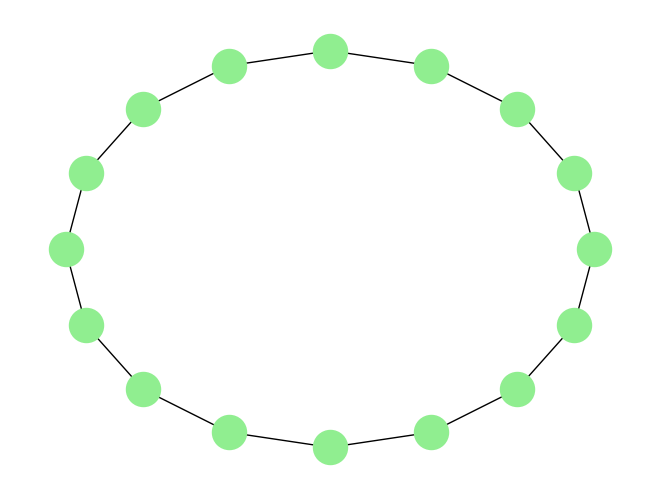

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.watts_strogatz_graph(16, 2, 0)
nx.draw_circular(G, node_color='lightgreen', node_size=600)


#  Il modello di Watts e Strogatz

* regular network
    * ogni nodo ha esattamente lo stesso numero di nodi vicini
    * la rete è formata ripetendo regolarmente unoi stesso pattern

* d-dimensional k-regular grids (d-lattice networks) 
    * d: numero delle dimensioni
    * k: numero di vicini per ogni nodo
        
* esempio: d=1 (rete lineare), k=4 :  **ring network**, 4 archi con i  nodi più vicini


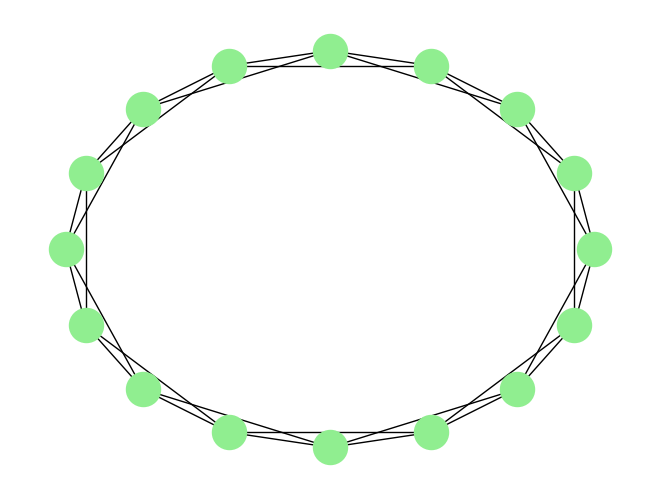

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.watts_strogatz_graph(16, 4, 0)
nx.draw_circular(G, node_color='lightgreen', node_size=600)


#  Il modello di Watts e Strogatz

* regular network
    * ogni nodo ha esattamente lo stesso numero di nodi vicini
    * la rete è formata ripetendo regolarmente unoi stesso pattern

* d-dimensional k-regular grids (d-lattice networks) 
    * d: numero delle dimensiono
    * k: numero di vicini per ogni nodo
      
* esempio: d=2 (rete bidimensionale), k=3 
    * **dodecahedral network**, rete in più dimensioni in cui ogni nodo ha 3 vicini


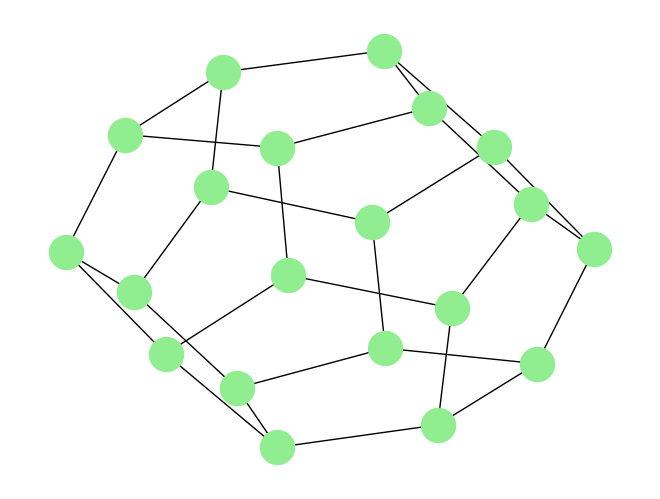

In [3]:
G = nx.dodecahedral_graph()
nx.draw(G,node_color='lightgreen', node_size=600)


# Il modello di Watts e Strogatz

* idee di base
    * una rete regolare possiede un alto livello di clusterizzazione, ma non è una rete small world perchè i cammini sono lunghi
    * una rete random possiede cammini brevi, ma non un alto livello di clusterizzazione
* cha la soluzione sia in un "modello di mezzo"?
    * **introdurre un livello di caos sufficiente per diminutire il grado di separazione tra i nodi**
    * un compromesso tra il caos e la regolarità

<img src="Figures/WattsStrogatz.jpg" style="width:1000px;height:400px;"/>

# Il modello di Watts e Strogatz

* iniziare con una rete regolare, un anello di n vertici 
* connettere ogni vertice a **k** vicini
* considerare ogni arco **e** del grafo e **riavvolgerlo**, con una probabilità *p*
    * considerare **e**, un vertice **v** di **e**, e scegliere un altro vertice **v1**, in maniera uniforme tra tutti i vertici del grafo
    * gettare una monetina, che produce un output "testa" con probabilità **p**, definita secondo una distribuzione scelta
    * se è uscita testa, modificare **e**, facendolo puntare a **v1**
    * se è uscita croce, lasciare l'arco invariato
* quetsi garfi sono generati usando la funzione
    **watts_strogatz_graph(n, k, p, seed)** di **NetworkX**, impostando la probabilità desiderata

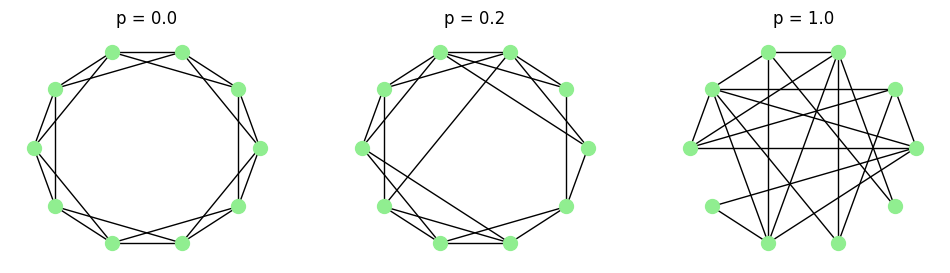

In [4]:
n = 10
k = 4
ps = [0, 0.2, 1]
fig = plt.figure(figsize=(12, 3))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    G = nx.watts_strogatz_graph(n, k, ps[i])
    ax.set_title('p = %.1f' % ps[i])
    nx.draw_circular(G, node_color='lightgreen', node_size=100)
plt.show()


* quando **p=0**, il grafo è regolarr
* quando **p=1** il grafo è random
* i valori interessanti sono quelli intermedi.

# Il modello di Watts e Strogatz

<img src="Figures/SmallWorld1.jpg" style="width:800px;height:400px;"/>

# Il modello di Watts e Strogatz: clustering coefficient

In [5]:
n = 1000
k = 10
ps = [0, 0.02, 1]
print ("p     Clustering Coefficient     Path Length")
print ('-'*50)
for p in ps:
    G = nx.watts_strogatz_graph(n, k, p)
    C = nx.average_clustering(G)
    L = nx.average_shortest_path_length(G)
    print  (p,"\t", C,"\t", L)
    

p     Clustering Coefficient     Path Length
--------------------------------------------------
0 	 0.6666666666666636 	 50.450450450450454
0.02 	 0.6299046897546865 	 6.868032032032032
1 	 0.00867598708481061 	 3.2673813813813815


# Studio del modello al variare della probabilità p: scala logaritmica

* considerare l'asse **x** ed una serie di valori **x1,...,xn**
* trasformazione di variabili
    * **X = log(x)**: ogni valore **xi** è rappresentato sull'asse delle x da una distanza dall'origine pari a **log(x)**
* poichè per valori crescenti la curva logaritmica cresce  lentamente, la distanza di un punto dall'origine cresce via via più lentamente
    * il valore **1** si trova a distanza **0** dall'origine
    * il valore **10** si trova a distanza **1**
    * il valore **100** si trova a distanza **2** dall'origine
    * e così via...
* le potenze della base sono equamente distribuite, perchè il logaritmo restituisce i valori 1,2,3,...



<img src="Figures/LogarithmicScale.jpg" style="width:1200px;height:100px;"/>

# Studio del modello al variare della probabilità p "di riavvolgimento"

In [6]:
import numpy as np
n_iter = 3
ps = np.logspace(-4, 0, 10)

Cp = np.zeros((n_iter, ps.size))
Lp = np.zeros((n_iter, ps.size))

for i in range(n_iter):
    for j in range(ps.size):
        G = nx.watts_strogatz_graph(n, k, ps[j])
        Cp[i,j] = nx.average_clustering(G)
        Lp[i,j] = nx.average_shortest_path_length(G)

# Normalized by L0, C0
for i in range(1, Cp.shape[1]):
    Cp[:,i] = Cp[:,i] / Cp[:,0]
    Lp[:,i] = Lp[:,i] / Lp[:,0]
Cp[:,0] = 1; Lp[:,0] = 1

# Averages over all iterations
Cs = np.mean(Cp, axis=0)
Ls = np.mean(Lp, axis=0)


* **np.logspace**: restituisce un insieme di valori
    * in un intervallo definito in scala logaritmica tra la potenza **-4** e la potenza **0** di **10**
    * uniformemente distribuiti nell'intervallo in scala logaritmica

# Studio del modello al variare della probabilità p

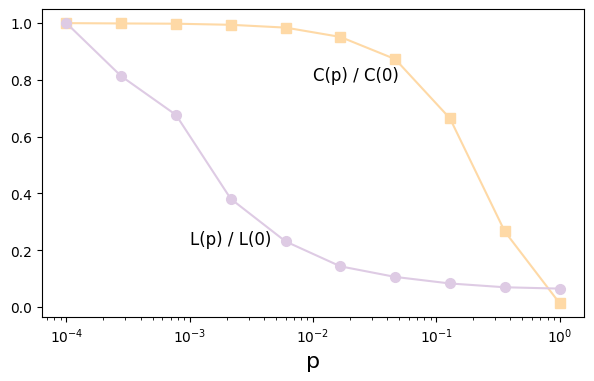

In [7]:
plt.figure(figsize=(7,4))
plt.plot(ps, Cs, marker='s', color='#FED9A6', markersize=7)
plt.plot(ps, Ls, marker='o', color='#DECBE4', markersize=7)
plt.xscale('log')
plt.text(0.01, 0.8, 'C(p) / C(0)', fontsize=12)
plt.text(0.001, 0.22, 'L(p) / L(0)', fontsize=12)
plt.xlabel('p', fontsize=16)
plt.show()

* per valori anche molto piccoli della probabilità **p**, la lunghezza media dei cammini minimi si abbassa drasticamente
* il coefficente di clusetring rimane invece alto

# Networkx: la classe Graph

* la libreria consente di gestire 4 diversi tipi di grafi
* ad ogni grafo corrisponde una classe di **NetworkX**
    * **Graph** grafi non orientati semplici (possibili self loops)
    * **DiGraph** grafi orientati (diretti) semplici (possibili self loops)
    * **MultiGraph** grafi non orientati in cui possono essere presenti più archi tra due nodi  (possibili self loops)
    * **MultiDiGraph**  grafi orientati in cui possono essere presenti più archi tra due nodi  (possibili self loops)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
grafo_non_orientato =nx.Graph()


# NetworkX: la classe Graph, inserire nodi


* inserire **nodi singoli**, indicando eventualmente una label da associare al nodo


In [9]:
grafo_non_orientato.add_node('Alice')
grafo_non_orientato.add_node('')


* inserire un insieme di nodi prelevandoli da un **iterable object**

In [10]:
grafo_non_orientato.add_nodes_from(['Charles','Bob','Eve'])


* fondere due grafi


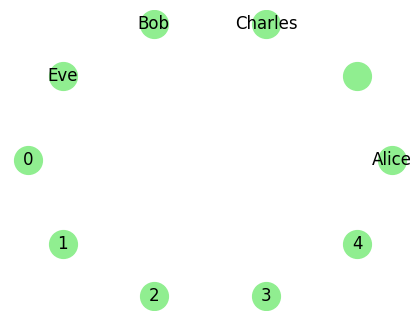

In [11]:
plt.figure(figsize=(4,3))
H = nx.path_graph(5)
grafo_non_orientato.add_nodes_from(H)
nx.draw_circular(grafo_non_orientato, node_color='lightgreen', node_size=400, with_labels=True)


# NetworkX: la classe Graph, inserire nodi

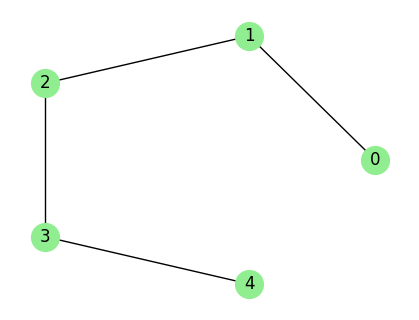

In [12]:
plt.figure(figsize=(4,3))
nx.draw_circular(H, node_color='lightgreen', node_size=400, with_labels=True)

# NetworkX: la classe Graph, inserire archi

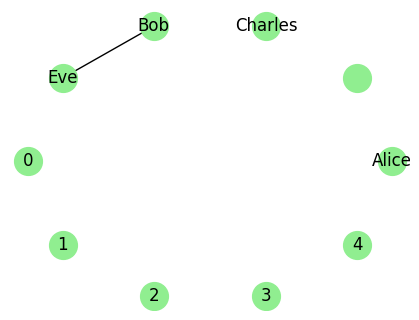

In [13]:
plt.figure(figsize=(4,3))
grafo_non_orientato.add_edge('Eve','Bob')
nx.draw_circular(grafo_non_orientato, node_color='lightgreen', node_size=400, with_labels=True)


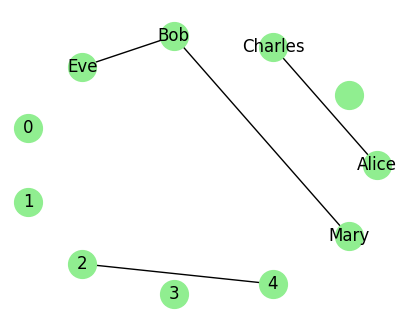

In [14]:
plt.figure(figsize=(4,3))
grafo_non_orientato.add_edges_from([('Charles','Alice'), (2,4), ('Mary','Bob')])
nx.draw_circular(grafo_non_orientato, node_color='lightgreen', node_size=400, with_labels=True)


* se uno o entrambi gli estremi dell'arco non esistono, vengono creati automaticamente i nodi corrispondenti.

# Analizzare il grafo e la struttura dati che lo memorizza: nodi

In [15]:
print(grafo_non_orientato.nodes())
print(grafo_non_orientato.edges())


['Alice', '', 'Charles', 'Bob', 'Eve', 0, 1, 2, 3, 4, 'Mary']
[('Alice', 'Charles'), ('Bob', 'Eve'), ('Bob', 'Mary'), (2, 4)]


* le funzioni **nodes()** e **edges()** sono funzioni che
    * leggono i **dati grezzi** all'interno dell'oggetto di tipo **Graph**
    * producono una lista formattata di nodi/archi
    
* tuttavia, **NetworkX** permette di accedere direttamente alla rappresentazione interna dell'oggetto **Graph**
    * si utilizzano le proprietà dell'oggetto

In [16]:
grafo_non_orientato.nodes.data()


NodeDataView({'Alice': {}, '': {}, 'Charles': {}, 'Bob': {}, 'Eve': {}, 0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 'Mary': {}})

* i dati relativi ai nodi sono memorizzati in un **Dictionary Python**
    * chiavi: nomi dei nodi
    * valori: proprietà dei nodi, che nel nostro caso sono tutti vuoti. Se aggiungo proprietà del nodo, queste vengono memorizzate in un dictionary interno. La struttura risultante è quindi un dictionary of dictionary.

# Modificare le proprietà di un nodo

In [17]:
grafo_non_orientato.nodes['Alice']['job']='student'
grafo_non_orientato.nodes['Alice']['age']=22
grafo_non_orientato.nodes['Bob']['hobby']='singing'
grafo_non_orientato.nodes['Bob']['age']=30
grafo_non_orientato.nodes['Bob']['gender']='male'
grafo_non_orientato.nodes.data()


NodeDataView({'Alice': {'job': 'student', 'age': 22}, '': {}, 'Charles': {}, 'Bob': {'hobby': 'singing', 'age': 30, 'gender': 'male'}, 'Eve': {}, 0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 'Mary': {}})

* le proprietà di un nodo sono memorizzate in un dizionario associato a quel nodo
* struttura dati risultante: **dictionay of dictionary**
* si sfrutta la flessibiltà offerta da Python: dizionari che memorizzano attributi di nodi diversi possono avere 
    * numero di chiavi diverse
    * memorizzare attributi di tipo diverso

# Analizzare il grafo e la struttura dati che lo memorizza: archi

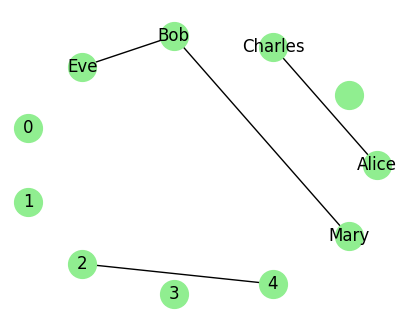

In [18]:
plt.figure(figsize=(4,3))
grafo_non_orientato.add_edges_from([('Charles','Alice'), (2,4), ('Mary','Bob')])
nx.draw_circular(grafo_non_orientato, node_color='lightgreen', node_size=400, with_labels=True)


In [19]:
temp=nx.to_dict_of_dicts(grafo_non_orientato)
print(temp)


{'Alice': {'Charles': {}}, '': {}, 'Charles': {'Alice': {}}, 'Bob': {'Eve': {}, 'Mary': {}}, 'Eve': {'Bob': {}}, 0: {}, 1: {}, 2: {4: {}}, 3: {}, 4: {2: {}}, 'Mary': {'Bob': {}}}


* la struttura che memorizza gli archi si chiama **edges** ed è un **Python dictionary**
* per ogni entrata del dizionario
    * la chiave è l'identificatore del nodo **n**
    * il valore è un altro dizionario, in cui ogni elemento del dizionario corrisponde a un vicino di **n**
    * alla chiave del nodo vicino corrisponde un valore che è un altro dizionario che contiene le proprità dell'arco corrispondente
* la struttura risultante è un **dictionary of dictionay of dictionary**

# Modificare le proprietà di un arco

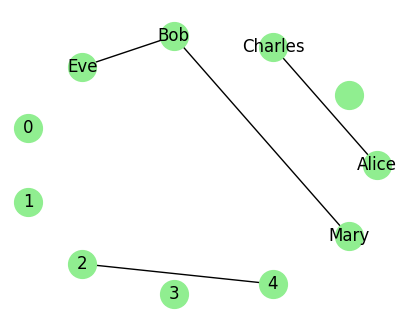

In [20]:
plt.figure(figsize=(4,3))
grafo_non_orientato.add_edges_from([('Charles','Alice'), (2,4), ('Mary','Bob')])
nx.draw_circular(grafo_non_orientato, node_color='lightgreen', node_size=400, with_labels=True)


In [21]:
grafo_non_orientato['Alice']['Charles']['inlove']=True
grafo_non_orientato['Bob']['Mary']['trust']=0.3
temp=nx.to_dict_of_dicts(grafo_non_orientato)
print(temp)


{'Alice': {'Charles': {'inlove': True}}, '': {}, 'Charles': {'Alice': {'inlove': True}}, 'Bob': {'Eve': {}, 'Mary': {'trust': 0.3}}, 'Eve': {'Bob': {}}, 0: {}, 1: {}, 2: {4: {}}, 3: {}, 4: {2: {}}, 'Mary': {'Bob': {'trust': 0.3}}}


# Analisi di un dataset reale: FriendHook

* analizzeremo un dataset prelevato da una applicazione di social Networking **FriendHook**
* social networking app per studenti
* ogni studente è caratterizzato da un profilo
* dopo essersi registrato e aver creato un profilo, uno studente può inviare richieste di amicizia a altri studenti
* lo studente che riceve la richiesta di amicizia può approvare o rifiutare la richiesta
* quando una richiesta è approvata i due studenti sono ufficilamente **amici** e possono condividere contenuti


# Analisi di un dataset reale: FriendHook


* un **DataSet** prelevato da un sottoinsieme di **Facebook** 

* i dataset a disposizione

    * **Profile.csv** contiene i profili
        * per garantire la privacy è presente l'hash dell'identità dell'utente, invece del dato in chiaro
    * **Friendships.csv** contiene le relazioni di fiducia stabilite tra utenti
    * **Observations.csv** contiene i suggerimenti di nuove amicizie proposte agli studenti e le risposte degli studenti

* in questo esercizio analizzeremo prevaletemente i primi due dataset, con un obiettivo preciso
    
* **un'osservazione importante!**
    * il grafo è stato ricavato da una rete di amicizie più grande
    * si sono considerati alcuni nodi inziali e se ne sono prese le **ego networks**
    * la rete comprende la **ego network** di ognuno di questi nodi
        * il nodo,  i suoi amici e le relazioni di amicizia tra i suoi amici
    * le **ego networks** sono state poi combinate
    * il grafo risultatnte contiene un sottoinsieme di una rete sociale

# FriendHook: analisi dei profili

In [22]:
import pandas as pd

def summarize_table(df):
    n_rows, n_columns = df.shape
    print(f"The table contains {n_rows} rows and {n_columns} columns.")
    print("Table Summary:\n")
    summary = df.describe()
    print(summary.to_string())

df_profile = pd.read_csv('Dataset/Profiles.csv')
print(df_profile.head())
summarize_table(df_profile)


     Profile_ID           Sex Relationship_Status          Dorm         Major  \
0  b8bc075e54b9  6fb336b554b6        9cea719429e9  4bb4df9e464e  827e5c7758c2   
1  49194b3720b6  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  3c285c164f0c   
2  f0f5962bbc52  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  f99bb3b6a185   
3  d42f06d92a52  6fb336b554b6        ac0b88e46e20  2a59be064efd  db85f196a0a8   
4  81123b29ee66  e807eb960650        9cea719429e9  a8e6e404d1b3  141d4cdd5aaf   

           Year  
0  c1a648750a4b  
1  8724226d4754  
2  c1a648750a4b  
3  222a76d38f58  
4  222a76d38f58  
The table contains 4039 rows and 6 columns.
Table Summary:

          Profile_ID           Sex Relationship_Status          Dorm         Major          Year
count           4039          4039                3631          4039          4039          4039
unique          4039             2                   3            15            30             4
top     b8bc075e54b9  e807eb960650        ac0b88e46e20

* **4039** profili distinti
* il sesso più frequente appare 2020 volte: distribuzione uniforme dei diversi generi
* **Dorm** e **Major**, locazione della casa dello studente assegnata
* **Relationship status**
    * 3 valori
    * solo 3631 valori non nulli, il campo è nullo nelle righe rimanenti

# FriendHook: analisi dei profili

In [23]:
is_null = df_profile.Relationship_Status.isnull()
print(df_profile[is_null].head())
num_null = df_profile[is_null].shape[0]
print(f"{num_null} profiles are missing the Relationship Status field.")


      Profile_ID           Sex Relationship_Status          Dorm  \
9   1d54d57a01a7  6fb336b554b6                 NaN  a8e6e404d1b3   
30  2631addff82d  6fb336b554b6                 NaN  a8e6e404d1b3   
35  de2965ac31c3  6fb336b554b6                 NaN  a8e6e404d1b3   
41  1e498fd35e79  6fb336b554b6                 NaN  15f366ad6d42   
44  08452885ff12  6fb336b554b6                 NaN  0893eb69bfe9   

           Major          Year  
9   141d4cdd5aaf  e725dc5618e5  
30  141d4cdd5aaf  222a76d38f58  
35  141d4cdd5aaf  8724226d4754  
41  5f952c1d1550  c1a648750a4b  
44  f99bb3b6a185  c1a648750a4b  
408 profiles are missing the Relationship Status field.


In [24]:
unique_ids = set(df_profile.Relationship_Status.values)
print(unique_ids)


{nan, 'ac0b88e46e20', '188f9a32c360', '9cea719429e9'}


* i valori del **relationship status** sono 3 valori hash + **NaN**
* i tre hash corrispondono allo stato **"Single"**, **"InARelationship**, **"It is Complicated"**

# Trasformare i valori hash in identificatori

* assegnare un valore numerico ad ogni categoria di **relationship status**

In [25]:
import numpy as np
category_map = {'9cea719429e9': 0, np.nan: 1, '188f9a32c360': 2, 
                'ac0b88e46e20': 3}


In [26]:
nums = [category_map[hash_code] for hash_code in df_profile.Relationship_Status.values]
df_profile['Relationship_Status'] = nums
print(df_profile.Relationship_Status)


0       0
1       3
2       3
3       3
4       0
       ..
4034    3
4035    0
4036    3
4037    3
4038    0
Name: Relationship_Status, Length: 4039, dtype: int64


# Trasformare i valori hash nei profili

In [27]:
col_to_mapping = {'Relationship_Status': category_map}

for column in df_profile.columns:
    if column in col_to_mapping:
        continue
        
    unique_ids = sorted(set(df_profile[column].values))
    category_map = {id_: i for i, id_ in enumerate(unique_ids)}
    col_to_mapping[column] = category_map
    nums = [category_map[hash_code] 
            for hash_code in df_profile[column].values]
    df_profile[column] = nums

head = df_profile.head()
print(head.to_string(index=False))


 Profile_ID  Sex  Relationship_Status  Dorm  Major  Year
       2899    0                    0     5     13     2
       1125    0                    3    12      6     1
       3799    0                    3    12     29     2
       3338    0                    3     4     25     0
       2007    1                    0    12      2     0


* la funzione **enumerate**, aggiunge un contatore ad ogni elemento di un **oggetto iterabile**


# Analizzare il grafo delle amicizie

In [28]:
df_friends = pd.read_csv('Dataset/Friendships.csv')
print(df_friends.head())
summarize_table(df_friends)


       Friend_A      Friend_B
0  b8bc075e54b9  49194b3720b6
1  b8bc075e54b9  f0f5962bbc52
2  b8bc075e54b9  d42f06d92a52
3  b8bc075e54b9  81123b29ee66
4  b8bc075e54b9  b1b65a546a3e
The table contains 88234 rows and 2 columns.
Table Summary:

            Friend_A      Friend_B
count          88234         88234
unique          3646          4037
top     89581f99fa1e  97ba93d9b169
freq            1043           251


In [29]:
import networkx as nx
G = nx.Graph()
for id1, id2 in df_friends.values:
    node1 = col_to_mapping['Profile_ID'][id1]
    node2 = col_to_mapping['Profile_ID'][id2]
    G.add_edge(node1, node2)
    
nodes = list(G.nodes)
num_nodes = len(nodes)
print(f"The social graph contains {num_nodes} nodes.")


The social graph contains 4039 nodes.


# Plotting the social graph

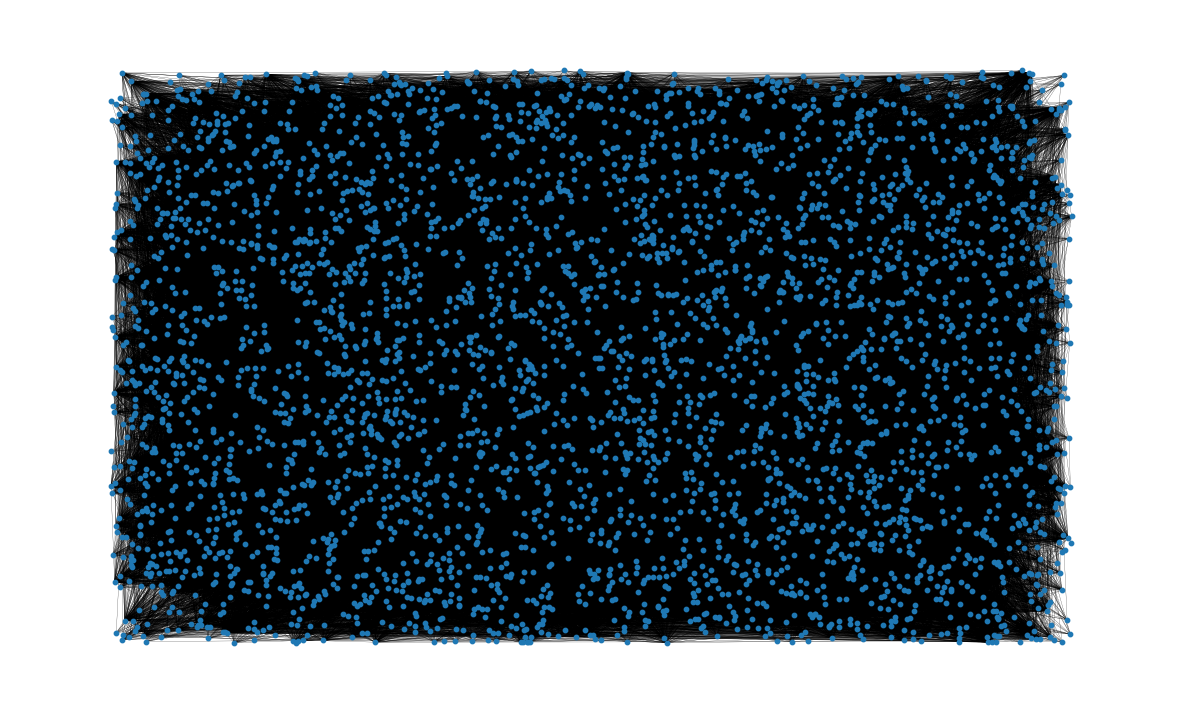

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)


# Plotting the social graph

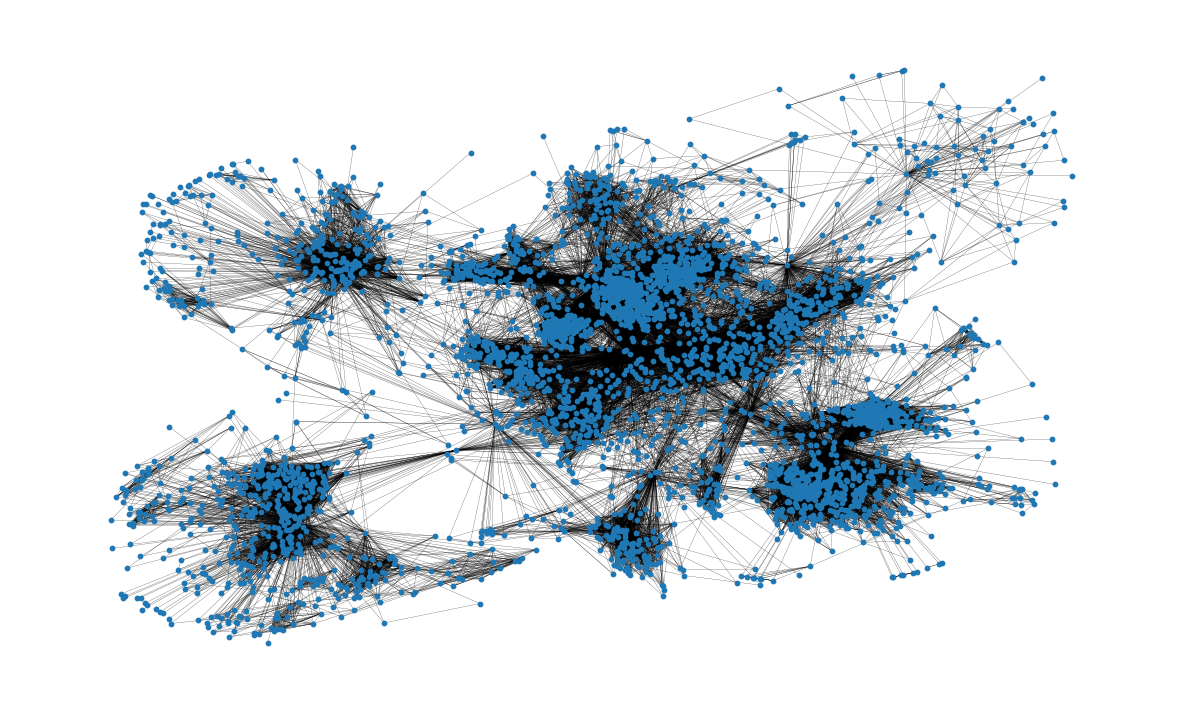

In [31]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)


# Proprietà topologiche del grafo

In [11]:
G.number_of_nodes()


4039

In [12]:
G.number_of_edges()


88234

In [13]:
np.mean([d for _, d in G.degree()])


43.69101262688784

# E' una rete small world?  

In [32]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))


In [33]:
shortest_path_lengths[100][210]


4

In [34]:
diameter=nx.diameter(G)
print(diameter)


8


* il diametro è basso

In [35]:
# Calcolare la lungheza media degli shortest paths
average_path_lengths = [ np.mean(list(spl.values())) for spl in shortest_path_lengths.values() ]

# Calcolare la media su tutti i nodi
np.mean(average_path_lengths)


3.691592636562027

# E' una rete small world? - Lunghezza dei cammini

Text(0, 0.5, 'Frequency (%)')

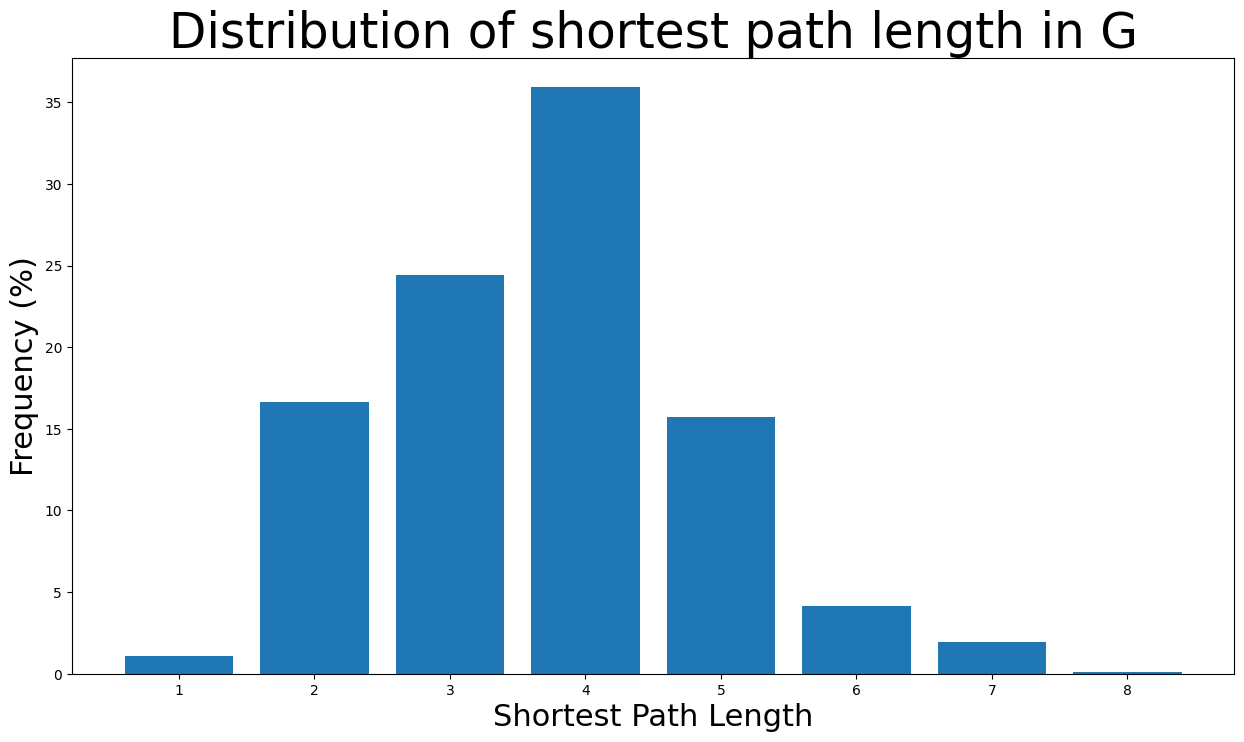

In [36]:
# Conosciamo la lunghezza del più lungo shortest path (il diametro), così possiamo creare un array
# per memorizzare i valori da 0 fino al valore del diametro

path_lengths = np.zeros(diameter + 1, dtype=int)

# Estrarre la frequenza degli shortest paths
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# esprimere la frequenza in percentuale (escludendo i valori uguali a 0)

freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plottare la distribuzione degli shortest paths (ignorando i path di lunghezza 0) come percentuale

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})


# E' una rete small world? - Coefficente di clustering

In [37]:
nx.average_clustering(G)


0.6055467186200866

In [38]:
nx.density(G)


0.010819963503439287

* Il coefficente di clusterin **CC** è **>>** della **densità** del grafo
* la rete è clusterizzzata e ha un diametro **corto**
    * **it is a small world!!**

# Distribuzione del Coefficente di clustering

Text(0, 0.5, 'Counts')

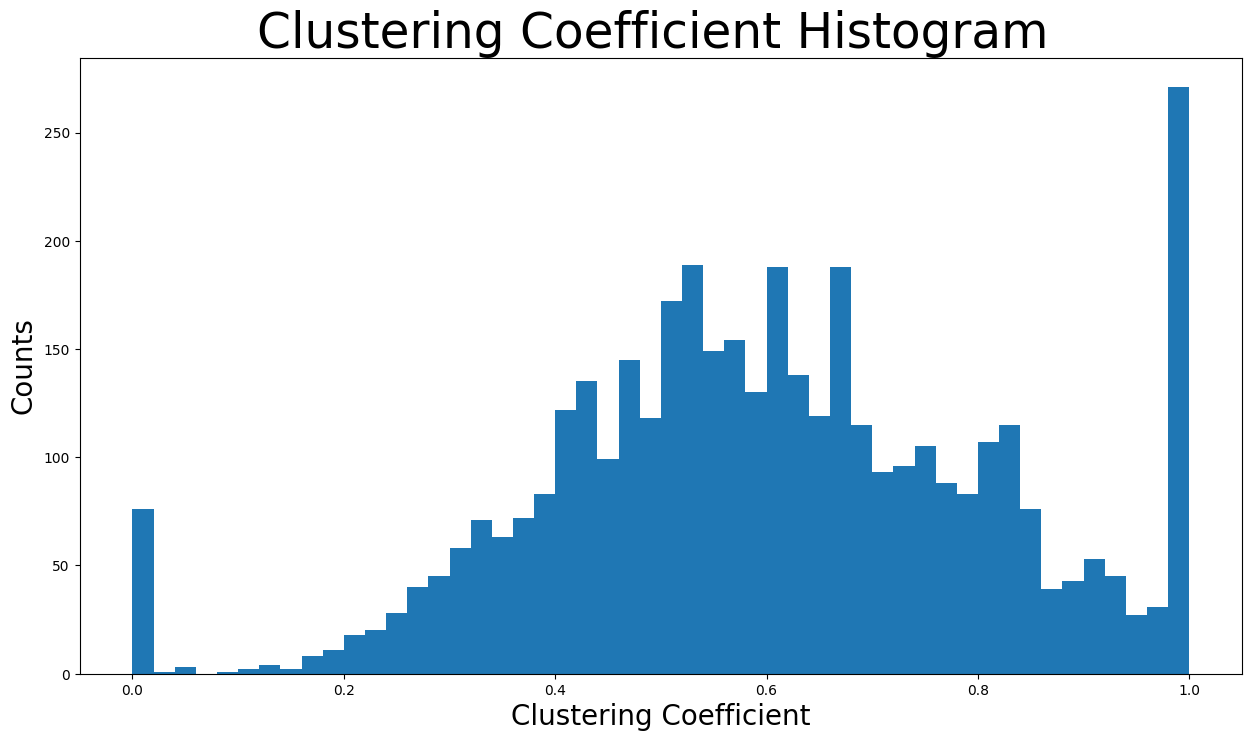

In [39]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})


# Graph Clustering

In [40]:
import markov_clustering as mc
import scipy
matrix = nx.to_scipy_sparse_array(G)
result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)
num_clusters = len(clusters)
print(f"{num_clusters} clusters were found in the social graph.")


c:\users\ricci\appdata\local\programs\python\python38\lib\site-packages\scipy\sparse\_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


9 clusters were found in the social graph.


In [41]:
for cluster_id, node_indices in enumerate(clusters):
    for i in node_indices:
        node = nodes[i]
        G.nodes[node]['cluster_id'] = cluster_id
        

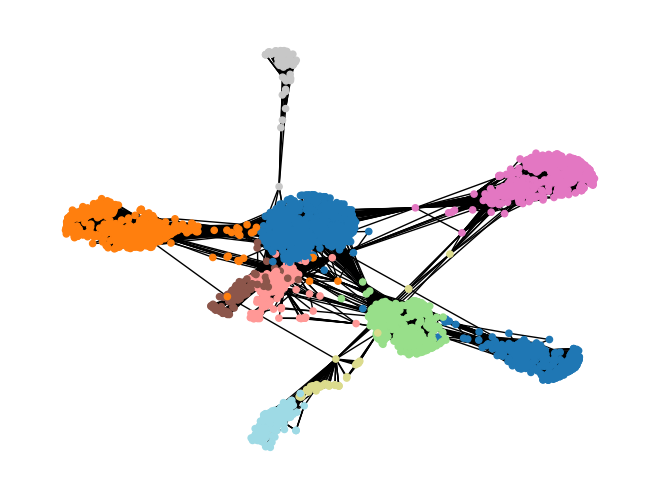

In [42]:
np.random.seed(0)
colors = [G.nodes[n]['cluster_id'] for n in G.nodes]
nx.draw(G, node_size=20, node_color=colors, cmap=plt.cm.tab20)
plt.show()
